In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("genome_prediction.csv")

In [4]:
data

,gsm,genome,genome_alias
0,gsm7709917,hg38,hg38
1,gsm7999811,mm10/GRCm38,NaN
2,gsm5872602,"mm10, ERCC",mm10
3,gsm6605824,mm10,mm10
4,gsm7884473,dm6,dm6
...,...,...,...
4391,gsm5139496,UCSC hg19,hg19
4392,gsm8496993,hg38,hg38
4393,gsm8487672,B73v5 or Mo17_CAU1.0,NaN
4394,gsm6426706,NaN,NaN


In [16]:
data['provided_in_predicted'] = data.apply(lambda row: str(row['genome']) in str(row['genome_alias']), axis=1)
data['predicted_in_provided'] = data.apply(lambda row: str(row['genome_alias']) in str(row['genome']), axis=1)


In [17]:
data

,gsm,genome,genome_alias,col1_in_col2,provided_in_predicted,predicted_in_provided
0,gsm7709917,hg38,hg38,True,True,True
1,gsm7999811,mm10/GRCm38,NaN,False,False,False
2,gsm5872602,"mm10, ERCC",mm10,True,False,True
3,gsm6605824,mm10,mm10,True,True,True
4,gsm7884473,dm6,dm6,True,True,True
...,...,...,...,...,...,...
4391,gsm5139496,UCSC hg19,hg19,True,False,True
4392,gsm8496993,hg38,hg38,True,True,True
4393,gsm8487672,B73v5 or Mo17_CAU1.0,NaN,False,False,False
4394,gsm6426706,NaN,NaN,True,True,True


In [34]:
not_predicted = data['genome_alias'].isnull().sum()
total = len(data['genome_alias'])
predicted = total - not_predicted

provided_in_predicted = data['provided_in_predicted'].sum()
not_provided_in_predicted = total - provided_in_predicted
predicted_in_provided = data['predicted_in_provided'].sum()
not_predicted_in_provided = total - predicted_in_provided


print(f"{total=}\n{predicted=}\n{not_predicted=}\n{provided_in_predicted=}\n{predicted_in_provided=}")


total=4396
predicted=3471
not_predicted=925
provided_in_predicted=2308
predicted_in_provided=2771


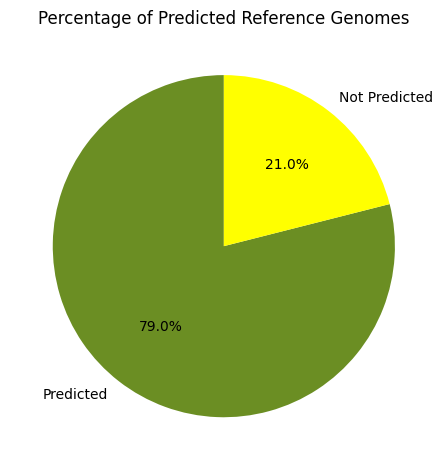

In [51]:
labels = ['Predicted', 'Not Predicted']
sizes = [predicted, not_predicted]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       colors=['olivedrab', 'yellow'], startangle=90)

ax.set_title('Percentage of Predicted Reference Genomes')
plt.tight_layout()

In [52]:
fig.savefig('./predicted_gen_precentage.svg')

Text(0.5, 1.0, 'Match Rate of Predicted Reference Genomes')

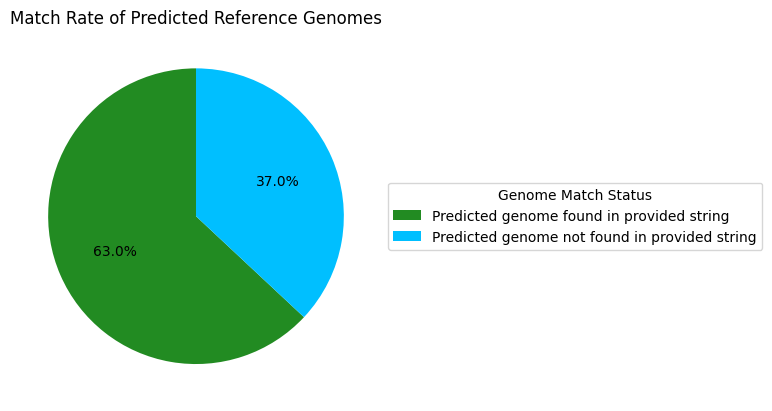

In [49]:
labels = ['Predicted genome found in provided string', 
          'Predicted genome not found in provided string']
sizes = [predicted_in_provided, not_predicted_in_provided]
colors = ['forestgreen', 'deepskyblue']  # green and red

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, colors=colors, autopct='%1.1f%%', startangle=90
)

# Add legend to the right
ax.legend(
    wedges, labels, title="Genome Match Status",
    loc="center left", bbox_to_anchor=(1, 0.5)
)

ax.set_title('Match Rate of Predicted Reference Genomes')

In [50]:
fig.savefig('./genome_match_status.svg')